# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dryden
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | island harbour
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | peremyshlyany
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | svetlyy
Processing Record 11 of Set 1 | urengoy
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | kupang
Processing Record 17 of Set 1 | port saint john's
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | san antonio de pale
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | kiffa
Proces

Processing Record 38 of Set 4 | cabo san lucas
Processing Record 39 of Set 4 | antofagasta
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | madang
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | acarau
Processing Record 44 of Set 4 | tomatlan
Processing Record 45 of Set 4 | meadow lakes
Processing Record 46 of Set 4 | usinsk
Processing Record 47 of Set 4 | nueva gerona
Processing Record 48 of Set 4 | kenora
Processing Record 49 of Set 4 | swift current
Processing Record 0 of Set 5 | sakakah
Processing Record 1 of Set 5 | changsu
Processing Record 2 of Set 5 | paracuru
Processing Record 3 of Set 5 | nelson bay
Processing Record 4 of Set 5 | greenville
Processing Record 5 of Set 5 | anadyr
Processing Record 6 of Set 5 | tiszaalpar
Processing Record 7 of Set 5 | kulhudhuffushi
Processing Record 8 of Set 5 | nadi
Processing Record 9 of Set 5 | arraial do cabo
Processing Record 10 of Set 5 | katsuura
Processing Record 11 of Set 5 | labytnangi

Processing Record 29 of Set 8 | anenii noi
Processing Record 30 of Set 8 | cacule
Processing Record 31 of Set 8 | manicore
Processing Record 32 of Set 8 | camacupa
Processing Record 33 of Set 8 | lillehammer
Processing Record 34 of Set 8 | nikko
Processing Record 35 of Set 8 | ulsan
Processing Record 36 of Set 8 | beau vallon
Processing Record 37 of Set 8 | puerto baquerizo moreno
Processing Record 38 of Set 8 | portel
Processing Record 39 of Set 8 | sumbe
Processing Record 40 of Set 8 | bac lieu
Processing Record 41 of Set 8 | majene
Processing Record 42 of Set 8 | talnakh
Processing Record 43 of Set 8 | paita
Processing Record 44 of Set 8 | zhanjiang
Processing Record 45 of Set 8 | port blair
Processing Record 46 of Set 8 | port moresby
Processing Record 47 of Set 8 | huittinen
Processing Record 48 of Set 8 | pangai
Processing Record 49 of Set 8 | mahilyow
Processing Record 0 of Set 9 | kourou
Processing Record 1 of Set 9 | nakasongola
Processing Record 2 of Set 9 | bargarh
Processin

Processing Record 21 of Set 12 | panna
Processing Record 22 of Set 12 | grand gaube
Processing Record 23 of Set 12 | karukh
Processing Record 24 of Set 12 | buzuluk
Processing Record 25 of Set 12 | abaete
Processing Record 26 of Set 12 | tubarjal
Processing Record 27 of Set 12 | nizhnesortymskiy
Processing Record 28 of Set 12 | hilo
Processing Record 29 of Set 12 | alo
Processing Record 30 of Set 12 | sao jose da coroa grande
Processing Record 31 of Set 12 | palikir - national government center
Processing Record 32 of Set 12 | remire-montjoly
Processing Record 33 of Set 12 | kill devil hills
Processing Record 34 of Set 12 | anshun
Processing Record 35 of Set 12 | bani yas city
City not found. Skipping...
Processing Record 36 of Set 12 | bafq
Processing Record 37 of Set 12 | bansi
Processing Record 38 of Set 12 | noumea
Processing Record 39 of Set 12 | beitbridge
Processing Record 40 of Set 12 | port hueneme
Processing Record 41 of Set 12 | tangalle
Processing Record 42 of Set 12 | cast

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dryden,49.7833,-92.7503,-2.84,63,100,4.12,CA,1700971272
1,tiksi,71.6872,128.8694,-24.67,98,84,0.99,RU,1700971571
2,island harbour,50.7240,-1.2758,3.29,64,100,1.03,GB,1700971572
3,bilibino,68.0546,166.4372,-14.39,88,94,3.10,RU,1700971573
4,waitangi,-43.9535,-176.5597,16.01,95,93,1.79,NZ,1700971574


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../Output/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dryden,49.7833,-92.7503,-2.84,63,100,4.12,CA,1700971272
1,tiksi,71.6872,128.8694,-24.67,98,84,0.99,RU,1700971571
2,island harbour,50.7240,-1.2758,3.29,64,100,1.03,GB,1700971572
3,bilibino,68.0546,166.4372,-14.39,88,94,3.10,RU,1700971573
4,waitangi,-43.9535,-176.5597,16.01,95,93,1.79,NZ,1700971574


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Convert Date format
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"]).dt.strftime("%Y-%m-%d")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dryden,49.7833,-92.7503,-2.84,63,100,4.12,CA,1970-01-01
1,tiksi,71.6872,128.8694,-24.67,98,84,0.99,RU,1970-01-01
2,island harbour,50.7240,-1.2758,3.29,64,100,1.03,GB,1970-01-01
3,bilibino,68.0546,166.4372,-14.39,88,94,3.10,RU,1970-01-01
4,waitangi,-43.9535,-176.5597,16.01,95,93,1.79,NZ,1970-01-01


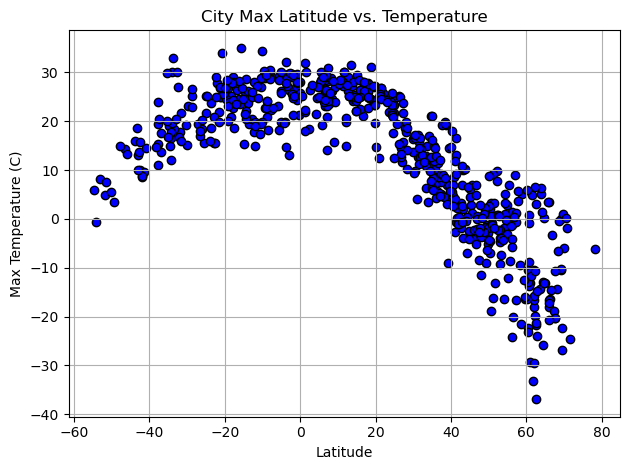

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature") 
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (C)") 
plt.grid(True) 
plt.tight_layout() 

# Save the figure 
plt.savefig("../Output/output_data/Fig1.png") 

# Show plot 
plt.show()

#### Latitude Vs. Humidity

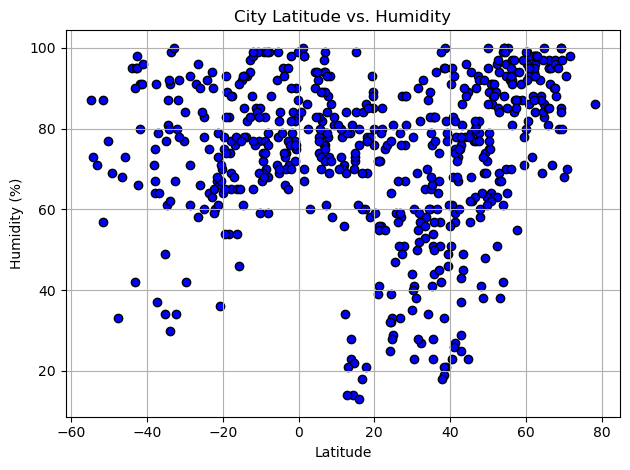

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity") 
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)") 
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../Output/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

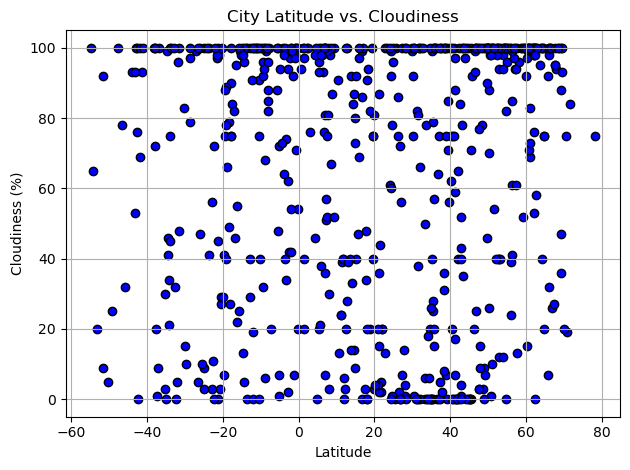

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness") 
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)") 
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../Output/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

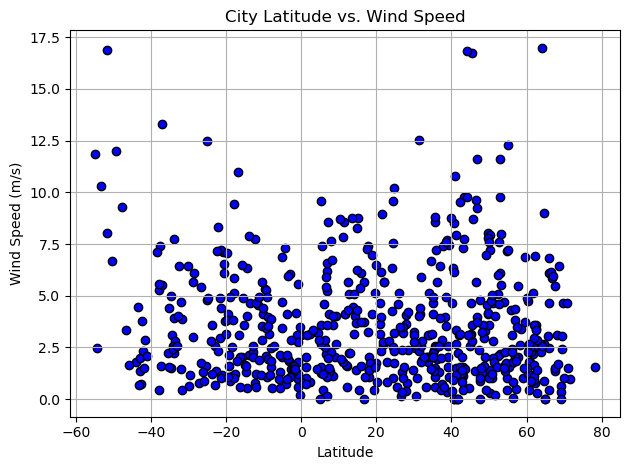

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed") 
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (m/s)") 
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../Output/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
    regress_values = x * slope + intercept 
    line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dryden,49.7833,-92.7503,-2.84,63,100,4.12,CA,1970-01-01
1,tiksi,71.6872,128.8694,-24.67,98,84,0.99,RU,1970-01-01
2,island harbour,50.7240,-1.2758,3.29,64,100,1.03,GB,1970-01-01
3,bilibino,68.0546,166.4372,-14.39,88,94,3.10,RU,1970-01-01
5,georgetown,5.4112,100.3354,29.96,74,20,3.60,MY,1970-01-01


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,waitangi,-43.9535,-176.5597,16.01,95,93,1.79,NZ,1970-01-01
8,bredasdorp,-34.5322,20.0403,14.96,87,41,1.52,ZA,1970-01-01
11,grytviken,-54.2811,-36.5092,-0.56,73,65,2.45,GS,1970-01-01
12,port-aux-francais,-49.3500,70.2167,3.54,69,25,12.02,TF,1970-01-01
15,kupang,-10.1667,123.5833,34.32,59,40,4.12,ID,1970-01-01


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8868170402565135


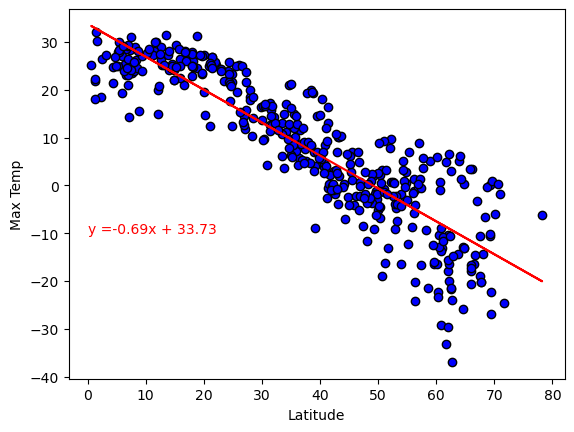

In [16]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.annotate(line_eq, (0, -10), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.6667360565545057


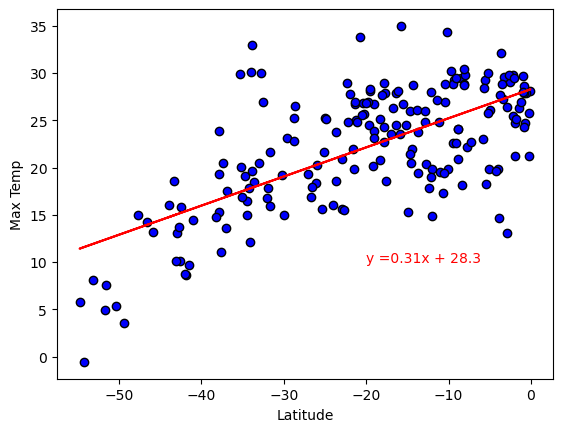

In [17]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.annotate(line_eq, (-20, 10), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a strong negative correlation between Latitude and Max Temperature. In comparison, in the Southern Hemisphere, there is a moderately strong positive correlation between Latitude and Max Temperature. This implies that as one of them approaches the equator, temperatures tend to rise.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.26814441862086896


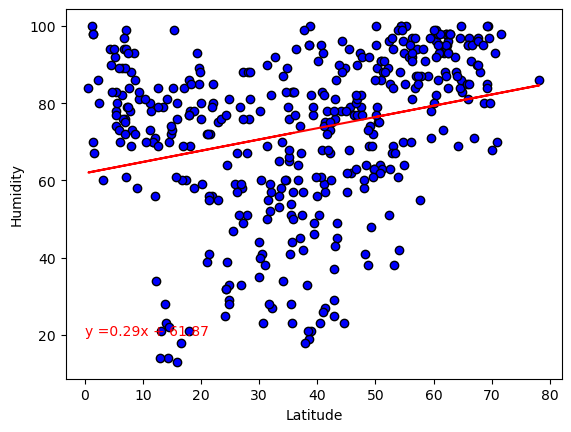

In [18]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.annotate(line_eq, (-0, 20), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.1580828892310821


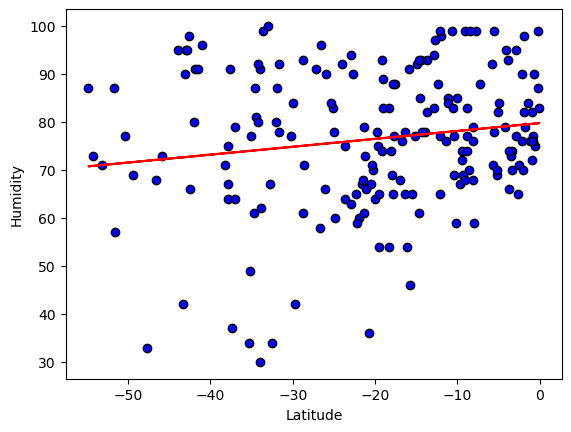

In [19]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.annotate(line_eq, (-20, 20), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a weak positive correlation between Latitude and Humidity. In comparison, in the Southern Hemisphere, there is little to none (very weak) positive correlation between Latitude and Humidity. Since both our correlations are weak, the results suggest that latitude alone is not a strong predictor of humidity, and other external factors could influence such weather patterns.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16684823189140224


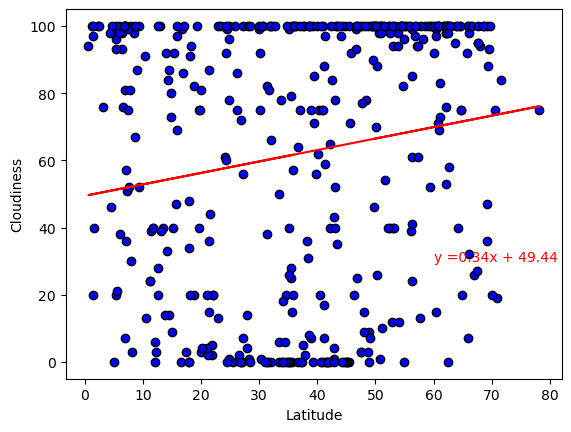

In [20]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.annotate(line_eq, (60, 30), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.14099913037056297


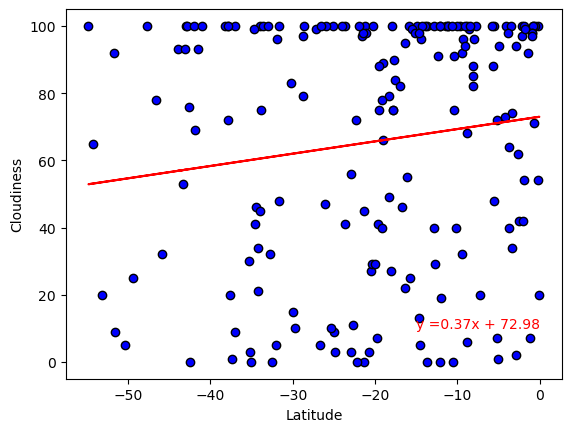

In [21]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.annotate(line_eq, (-15, 10), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very weak positive correlation between Latitude and Cloudiness. In comparison, in the Southern Hemisphere, there is little to none (very weak) positive correlation between Latitude and Cloudiness. Overall, both correlations are very weak, suggesting that latitude alone is not able to predict cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0224193626283899


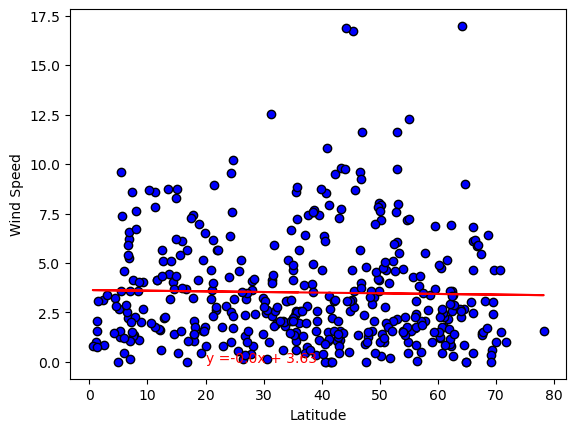

In [22]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.annotate(line_eq, (20, 0), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

The r-value is: -0.30424517419415537


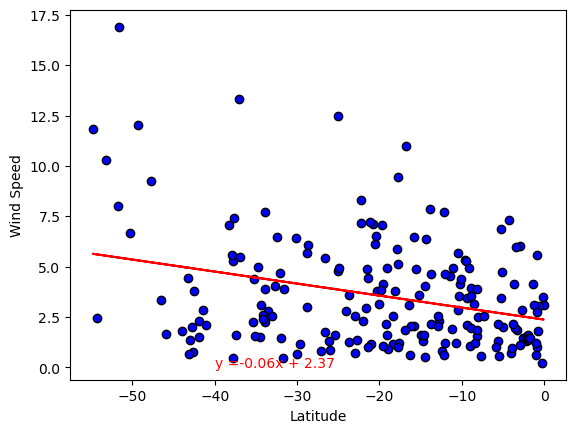

In [23]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.annotate(line_eq, (-40, 0), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very weak negative correlation between Latitude and Wind Speed. In comparison, in the Southern Hemisphere, there is very weak negative correlation between Latitude and Wind Speed. Overall, both correlations are very weak, suggesting that latitude alone is not able to predict wind speed in either hemisphere. Other external factors, likely play more significant roles in determining wind speed patterns.